In [52]:
case_name = 'max'

In [53]:
import pandas as pd

# Read the two CSV files
df1 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_area_var.csv')
df2 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_delay_var.csv')

# Concatenate the two DataFrames vertically
df = pd.concat([df1, df2], ignore_index=True)

# Write the new DataFrame to a CSV file
df.to_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_var_abc_combined.csv', index=False)

# Read the two CSV files
df1 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_area_var1.csv')
df2 = pd.read_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_delay_var1.csv')

# Concatenate the two DataFrames vertically
df = pd.concat([df1, df2], ignore_index=True)

# Write the new DataFrame to a CSV file
df.to_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_var_egraph_combined.csv', index=False)

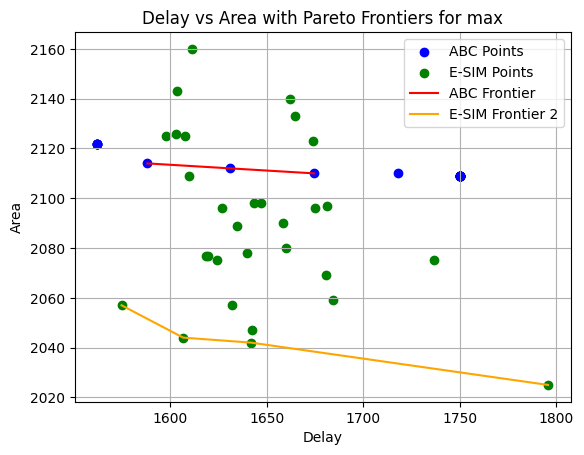

In [54]:
import matplotlib.pyplot as plt
import csv

# Parse CSV data
def parse_csv(filename):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = {}
        for row in reader:
            op = row['WireLoad']
            area = float(row['Area'])
            delay = float(row['Delay'])
            data[op] = (delay, area)
        return data

# Pareto frontier function
def pareto_frontier_points(Xs, Ys):
    pareto_points = []
    for i in range(len(Xs)):
        dominated = False
        for j in range(len(Xs)):
            if (Xs[j] <= Xs[i]) and (Ys[j] <= Ys[i]) and (i != j):
                dominated = True
                break
        if not dominated:
            pareto_points.append((Xs[i], Ys[i]))
    pareto_points.sort(key=lambda x: x[0])
    return pareto_points

data1 = parse_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_var_abc_combined.csv')
delays1 = [value[0] for value in data1.values()]
areas1 = [value[1] for value in data1.values()]
pareto1 = pareto_frontier_points(delays1, areas1)
pareto_x1 = [point[0] for point in pareto1]
pareto_y1 = [point[1] for point in pareto1]

data2 = parse_csv(f'/data/guangyuh/coding_env/E-Brush/res_visualization/var/{case_name}/sorted_var_egraph_combined.csv')
delays2 = [value[0] for value in data2.values()]
areas2 = [value[1] for value in data2.values()]
pareto2 = pareto_frontier_points(delays2, areas2)
pareto_x2 = [point[0] for point in pareto2]
pareto_y2 = [point[1] for point in pareto2]


# Plotting
plt.scatter(delays1, areas1, color='blue', label='ABC Points')
plt.scatter(delays2, areas2, color='green', label='E-SIM Points')
plt.plot(pareto_x1, pareto_y1, color='red', label='ABC Frontier')
plt.plot(pareto_x2, pareto_y2, color='orange', label='E-SIM Frontier 2')
plt.xlabel('Delay')
plt.ylabel('Area')
plt.title(f'Delay vs Area with Pareto Frontiers for {case_name}')
plt.legend()
plt.grid(True)
# Save the plot as a PDF file
plt.savefig(f'/data/guangyuh/coding_env/E-Brush/res_visualization/{case_name}_pareto.pdf', bbox_inches='tight')

# Show the plot
plt.show()

